In [1]:
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import matplotlib as mpl
import numpy as np

#Track2.wav

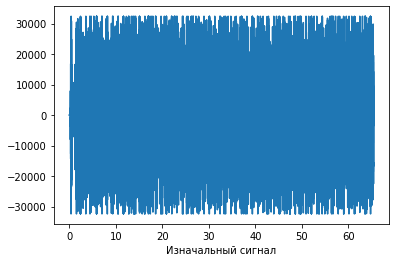

2883573


In [72]:
#считали звуковой файл
sr, data = wavfile.read("Track2.wav")
freq = 44100
#смотрим на наш сигнал
time= np.arange(0,len(data))/freq

plt.plot(time,data)
plt.xlabel("Изначальный сигнал")
plt.show()

#из-за того что data рид онли - считка в буферную переменную
Signal = []
for it in data:
    Signal.append(it)
print(len(Signal))

In [73]:
#Основные параметры
Fd = 44100 #частота дискретизации
N = 16384 #Размерность ДПФ
overlap = 0.75;#смещение начала кадра для пересечения

Sr = Fd/N #текущее спектральное разрешение
#Диапазон основного тона голоса (ставим мужской)
fi = 100
fu = 300
#Переводим в отсчеты спектра (при N=16384 в одном отсчете примерно 2.69
ni = fi / Sr
nu = fu / Sr


WinHamming = np.hamming(N)#генерирование окна Хэмминга для промежутка размера N

In [79]:
#Вычисление нотной последовательности
#Fi = F(i-1)*F(i-1)**(1/12) - формула странная, 1.059475078256682 практически подходит, будто под корнем какая-то константа

#как идея - сделать двумерный массив, в котором по строкам - ноты в октаве, по столбцам - сами октавы

Fnotes = []
F0 = 220 #Ля

Fnotes.append(F0)
i = 1
while i <= 60:
    Fnotes.append(Fnotes[i-1]*(1.059456078256682))#вычисляем согласно формуле Fi
    i += 1
    
print(Fnotes)

[220, 233.08033721647004, 246.9383799861063, 261.6203676311385, 277.1752886825574, 293.6550443372859, 311.114621633873, 329.61227692453457, 349.20973025572283, 369.9723713058019, 391.9694775669699, 415.27444549942237, 439.9650354290362, 466.12363100570883, 493.837514088073, 523.1991559717787, 554.3065259330667, 587.2634181171327, 622.1797978619915, 659.1721686134006, 698.3639606551056, 739.885942951462, 783.876659476603, 830.4828914860303, 879.8601472730593, 932.173181044262, 987.5965426452099, 1046.3151599707521, 1108.524956003126, 1174.4335025367327, 1244.2607127708259, 1318.239575081043, 1396.6169304181167, 1479.6542959276633, 1567.6287375391742, 1660.8337944357268, 1759.5804584890393, 1864.1982119278919, 1975.036126702243, 2092.464029211226, 2216.8737342813006, 2348.6803525119126, 2488.323675350792, 2636.2696425204035, 2793.0118966918117, 2959.073430593364, 3135.008332049991, 3321.4036327757053, 3518.8812670880457, 3728.1001470800047, 3949.7583611735413, 4184.595503390459, 4433.395

In [80]:
#Определение центров нот 
#Ci = Fi / Sr + 0.5
Cnotes = []
i = 0
while i <= 60:
    Cnotes.append(Fnotes[i]/Sr + 0.5)#вычисляем согласно формуле Ci 
    i += 1
    
print(Cnotes)

[82.23424036281179, 87.09383775407359, 92.2423677481262, 97.69700914441209, 103.47596212641768, 109.5985089891631, 116.0850784773101, 122.95731394856178, 130.23814558979055, 137.95186692685394, 146.124215883384, 154.78246065901442, 163.95549071359022, 173.6739131609418, 183.9701548938546, 194.87857078098918, 206.43555829676566, 218.67967896669165, 231.65178703335303, 245.39516577237993, 259.9556719132256, 275.3818886466384, 291.72528772935743, 309.04040122691885, 327.3850034676146, 346.82030381472083, 367.4111509002068, 389.22624900137873, 412.3383872824312, 436.8246826658011, 462.7668371437009, 490.2514103883857, 519.3701085707579, 550.220090350994, 582.904291062173, 617.5317661685929, 654.2180551447715, 693.0855669892649, 734.263988659627, 777.8907177913089, 824.1113211443272, 873.0800203073736, 924.960206279986, 979.9249846497572, 1038.1577531836426, 1099.8528137605822, 1165.2160206872347, 1234.4654675600261, 1307.8322149653184, 1385.5610614457778, 1467.9113603053809, 1555.157884978

In [7]:
#Определение интервалов нот - Li - левый, Ri - правый
#Ci = Fi / Sr + 0.5
LRnotes = [[]]
LRnotes.append([])
print(LRnotes)

i = 1

while i <= 60-1:
    LRnotes[0].append((Cnotes[i]+Cnotes[i-1])/2)#вычисляем левую границу интервала
    LRnotes[1].append((Cnotes[i]+Cnotes[i+1])/2)#вычисляем правую границу интервала
    i += 1
    
print(LRnotes[0])
print(LRnotes[1])

[[], []]
[84.66481553372614, 89.67052452405369, 94.97394844831118, 100.59279392549222, 106.54582067714081, 112.85290416070782, 119.53510192803142, 126.61472393049321, 134.11540700557913, 142.0621937935344, 150.48161634759242, 159.40178471692911, 168.85248079809492, 178.86525776826812, 189.47354543230915, 200.71276183533837, 212.62043151348158, 225.23631077758705, 238.60252044820203, 252.76368648497208, 267.7670889799849, 283.6628200125051, 300.50395089213157, 318.34670934875487, 337.2506672609009, 357.27893954923286, 378.4983948992595, 400.9798790167931, 424.79845116154337, 450.0336347485652, 476.7696828542468, 505.09585951328825, 535.1067377458387, 566.902515309822, 600.5893492326552, 636.2797102392688, 674.0927582597599, 714.1547402703932, 756.5994117962268, 801.5684834826386, 849.2120942267301, 899.6893124482573, 953.1686671736895, 1009.8287107065336, 1069.8586147625206, 1133.4588020599786, 1200.8416154740926, 1272.2320269891661, 1347.8683888158755, 1428.003229181279, 1512.904095448

In [81]:
#Делим на кадры t, затем умножая на окно (можно взять из прошлой работы)
#1 - разбиваем сигнал на отрезки длины N с перекрытиями
arrayN = [] #для хранения отрезков длины N
begin = 0#начало текущего кадра
end = N#конец текущего кадра

#пока конец кадра не выйдет за пределы. не учитывается последний участок
while end < len(data):
    it = 0
    buffN = []
    while it < N:#считываем отрезок длины N
        buffN.append(Signal[it+begin])
        it+=1
    arrayN.append(buffN)#сохраняем
    #смещаем к следующему отрезку
    begin+=int(overlap*N)
    end+=int(overlap*N)
    
print("где произошел обрыв и всего длина отрезка данных")
print(begin, len(data))
print("длина кадра, длина последнего (невошедшего участка)")
print(N, len(data)-begin)

#2 - преобразуем сигнал и получаем амплитудный спектр
it = 0
while it < len(arrayN):
    arrayN[it] = arrayN[it]*WinHamming#на каждом кадре умножаем сигнал на окно
    arrayN[it] = fft(arrayN[it])[:N//2]#вычисляем ДПФ с обрезкой для линейного амплитудного спектра
    arrayN[it] = np.abs(arrayN[it])# получаем ЛАС
    it+=1

xf = fftfreq(int(N), 1 / freq)[:N//2]#перевод оси x-ов в частотную, также с обрезкой

где произошел обрыв и всего длина отрезка данных
2875392 2883573
длина кадра, длина последнего (невошедшего участка)
16384 8181


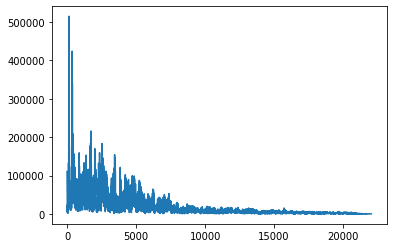

In [82]:
#сегмент для просмотра амплитудного спектра конкретного кадра (по индексу в arrayN)
index = 0

xf = fftfreq(int(N), 1 / freq)[:N//2]#перевод оси x-ов в частотную, также с обрезкой
plt.plot(xf, arrayN[index])#np.abs() вычисляет корень суммы квадратов реальной и мнимой части
plt.show()

#print(len(arrayN[index])*Sr)

In [83]:
#Вычисление матрицы нотного спектра для переданного кадра
def ZtComputate(LRnotes,arrayNframe):
    Zt = []
    i = 0;
    summaryLR = 0;
    #пока не пройдемся по всем отрезкам
    while i < len(LRnotes[0]):
        #берем сумму частот на отрезке
        #для соответствия массиву - делим частоту на Sr - будет соответствующая частота в массиве
        summaryLR = 0;
        itL = int(LRnotes[0][i]/Sr)
        itR = int(LRnotes[1][i]/Sr)
        j = itL
        while j < itR:
            summaryLR += arrayNframe[j];
            j+=1;
        #теперь вычисляем одно значение для матрицы 
        Zt.append(summaryLR/(LRnotes[1][i]-LRnotes[0][i]+1))#коммент если нужно было вичислять не среднее, а учитывая амплитуды
        #Zt.append(summaryLR/(itR-itL+1))
        i+=1
    return Zt


In [84]:
#Получение матрицы нотного спектра Z, ti (для всех кадров)
Ztimatrix = []
Ztmatrix = []   
maximus = 0
maximusI = 0
it = 0
#прохождение по кадрам
while it < len(arrayN):
    #для каждого составляем его одномерный массив по каждому промежутку
    #+ Сохраняем вычисленное в кадре значение в двумерный массив
    Ztimatrix.append(ZtComputate(LRnotes, arrayN[it]))
    it+=1

#вывод значений амплитуд (для будущего вычисления частот с максимальным значением)
#print(len(Ztimatrix[0]))
#print(Ztimatrix[2])

    

In [85]:
#Проходимся по матрице нотного спектра, выводя график
it = 0
#для хранения максимумов. по индексу 0 - первые максимумы, 1 - вторые, 2 - третьи
Zmax = []
Zmax.append([0] * len(arrayN))
Zmax.append([0] * len(arrayN))
Zmax.append([0] * len(arrayN)) 
minMax = 0
#print(Zmax)
#прохождение по кадрам
while it < len(arrayN):
    #на кадре ищем три максимума
    i = 0
    #пока не пройдем по кадру
    while (i < len(Ztimatrix[0])):
        Zvalue = Ztimatrix[it][i];#текущее значение
        if(Zvalue > Zmax[2][it]):#если значение больше минимального максимума
            j = 0
            #ищем ближайшее меньшее
            while (j < len(Zmax)-1 and Zvalue < Zmax[j][it]):
                j+=1
            k = len(Zmax)-1
            #смещаем значения
            while (j < k):
                Zmax[k][it] = Zmax[k-1][it]
                k-=1
            #сохраняем
            Zmax[k][it] = Zvalue
        i+=1
    it+=1

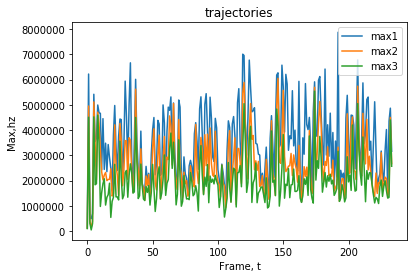

In [86]:
#Вывод траекторий максимумов таблиц нотного спектра
fig, ax = plt.subplots()
plt.title("trajectories")
plt.xlabel("Frame, t")
plt.ylabel("Max,hz")

idx = 0
while idx < len(Zmax):
    ax.plot(Zmax[idx], label=f"max{idx+1}")
    idx+=1
ax.legend()
plt.show()